In [15]:
# import thư viện cần thiết
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# đọc dữ liệu từ file csv
df = pd.read_csv('shopeep_koreantop_clothing_shop_data.csv')
df.head()

,pk_shop,date_collected,shopid,name,join_month,join_day,join_year,item_count,follower_count,response_time,response_rate,shop_location,rating_bad,rating_good,rating_normal,rating_star,is_shopee_verified,is_official_shop
0,20210613254711738,2021-06-13,254711738,hello.may.ph,April,27,2020,446,17487,10:13:55,96,NaN,181,17510,729,4.81,1,0
1,20210613314198143,2021-06-13,314198143,love.women.shop,September,25,2020,263,8574,10:43:05,73,"San Nicolas,Metro Manila",78,2656,198,4.68,0,0
2,2021061310377223,2021-06-13,10377223,R&O RedOrange,September,27,2016,209,660417,08:32:07,90,"Pasay City,Metro Manila",4647,1071829,18073,4.91,1,0
3,2021061321407329,2021-06-13,21407329,patriciacai,April,30,2017,165,18787,09:10:38,94,"Binondo,Metro Manila",44,18959,215,4.94,1,0
4,2021061311187885,2021-06-13,11187885,Little Market Manila,October,18,2016,467,67371,11:40:59,89,"Caloocan City,Metro Manila",680,39252,2383,4.73,1,0


#### Vẽ biểu đồ:
So sánh số lượng shop gia nhập theo các năm.
Xu hướng của số lượng shop gia nhập theo từng tháng trong từng năm.

In [17]:
df_join =  df.groupby('join_year')['name'].count()
df_join

join_year
2015      4
2016     27
2017    156
2018     87
2019    106
2020    247
2021    119
Name: name, dtype: int64

In [18]:
df_join_month =  df.groupby('join_month')['name'].count()
df_join_month

join_month
April        74
August       57
December     55
February     30
January      49
July         46
June         50
March        75
May          75
November     54
October      94
September    87
Name: name, dtype: int64

Text(0, 0.5, 'Số lượng shop')

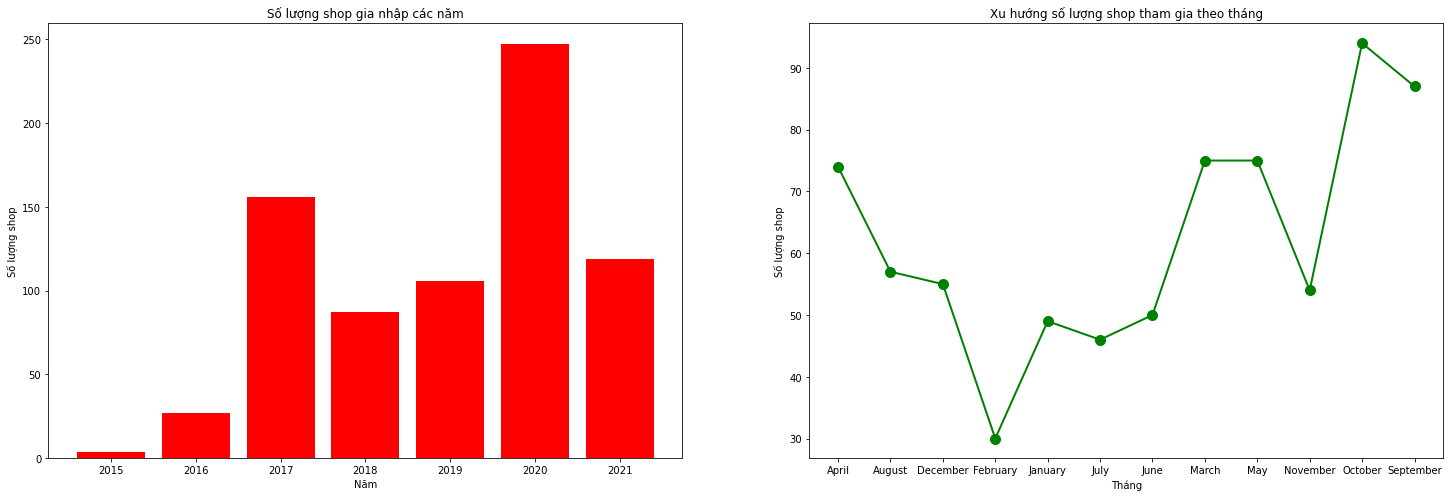

In [19]:
fig, ax = plt.subplots(1,2,figsize=(25, 8))
ax[0].bar(df_join.index, df_join,color='red', linestyle='dashed', linewidth=2)
ax[0].set_title('Số lượng shop gia nhập các năm')
ax[0].set_xlabel('Năm')
ax[0].set_ylabel('Số lượng shop')

ax[1].plot(df_join_month.index,df_join_month ,color='green', linestyle='solid', linewidth=2,marker='o',markersize=10)
ax[1].set_title('Xu hướng số lượng shop tham gia theo tháng')
ax[1].set_xlabel('Tháng')
ax[1].set_ylabel('Số lượng shop')

#### Vẽ biểu đồ thể hiện mối quan hệ giữa 
Tỉ lệ phản hồi với số lượt khách hàng đánh giá tốt, 
Thời gian phản hồi (đơn vị giây) với số lượt khách hàng đánh giá tốt.

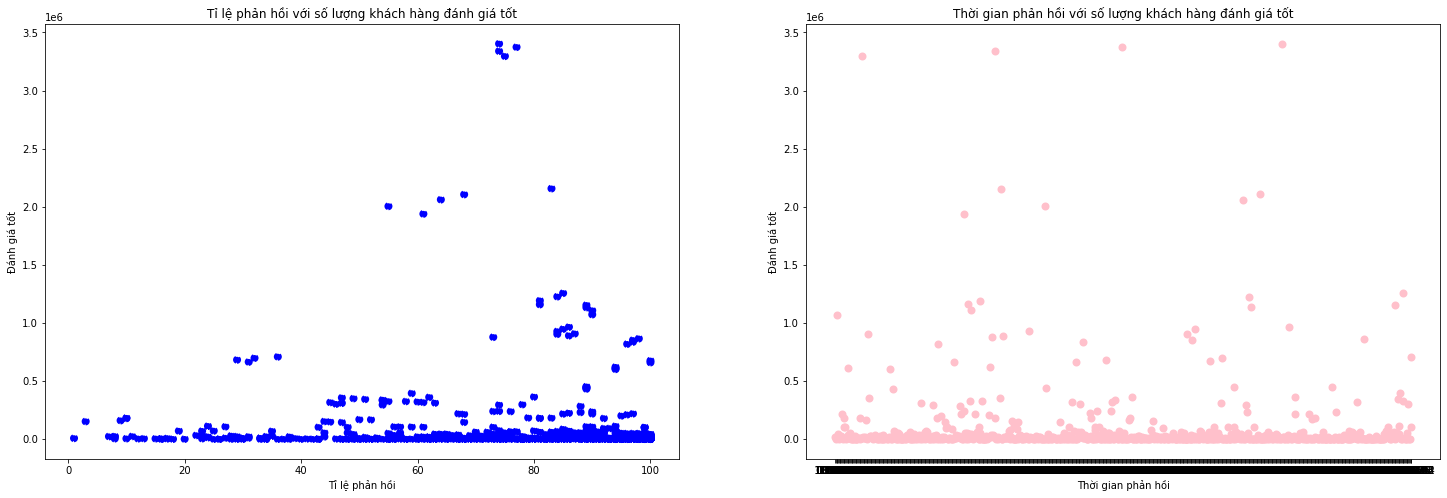

In [24]:
fig, ax = plt.subplots(1,2,figsize=(25, 8))
ax[0].scatter(df['response_rate'], df['rating_good'], color='blue',linestyle='dashed', linewidth=2)
ax[0].set_title('Tỉ lệ phản hồi với số lượng khách hàng đánh giá tốt')
ax[0].set_xlabel('Tỉ lệ phản hồi')
ax[0].set_ylabel('Đánh giá tốt')

ax[1].scatter(df['response_time'],df['rating_good'] , color='pink', linestyle='solid', linewidth=2)
ax[1].set_title('Thời gian phản hồi với số lượng khách hàng đánh giá tốt')
ax[1].set_xlabel('Thời gian phản hồi')
ax[1].set_ylabel('Đánh giá tốt');

#### Vẽ biểu đồ thể hiện phân bố của điểm đánh giá trung bình. 

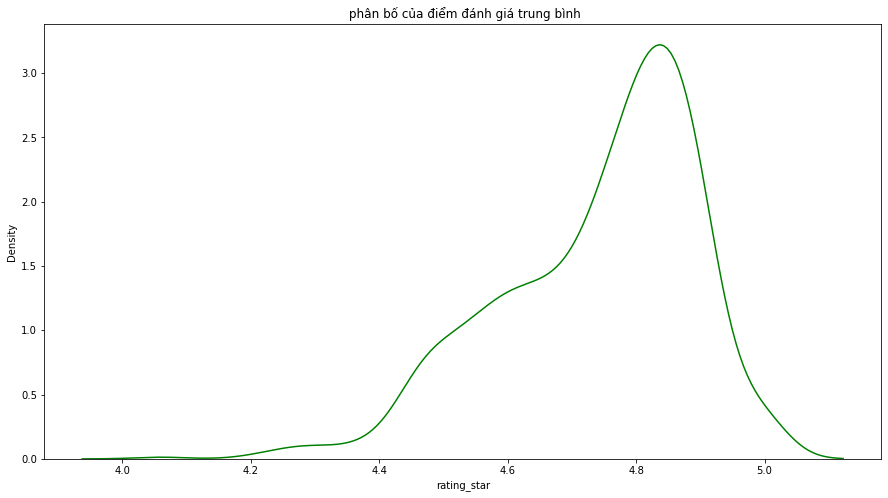

In [20]:
plt.figure(figsize=(15,8))
plt.title(' phân bố của điểm đánh giá trung bình')
sns.kdeplot(df['rating_star'], color='green');